In [1]:
# data manipulation
import numpy as np
import pandas as pd
import geopandas as gpd

# visualization
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch

# geospatial manipulation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geoplot
import geoplot.crs as gcrs

# projection
proj = ccrs.Mercator()

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/R-graph-gallery/master/DATA/world.geojson"
world = gpd.read_file(url)
world = world[~world['name'].isin(["Antarctica"])]
world = world.to_crs(proj.proj4_init)
df = pd.read_csv('data.csv')

def convert_lat_long(coord):
   try:
      if coord[-1] == 'N':
         return float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
      elif coord[-1] == 'S':
         return -float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
      elif coord[-1] == 'E':
         return float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", ".").replace(":", "."))
      elif coord[-1] == 'W':
         return -float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
   except:
      print(coord)
      return None
df['Latitude'] = df['Latitude'].apply(convert_lat_long)
df['Longitude'] = df['Longitude'].apply(convert_lat_long)

df = df[df['Latitude'].abs() <= 90]
df = df[df['Longitude'].abs() <= 180]
df = df[df['Magnitude'] <= 10]

def get_year(date):
   return date[-4:]
df['year'] = df['Date'].apply(get_year).astype(float)

df.to_csv('earthquakes.csv', index=False)
df.sample(10)

2.7.37 N


,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map,year
6753,25/07/2019,14:16:37,14KM SE OF HAYATABAD,3.7,35,33.86,71.52,M,-,2019.0
4963,27/12/2020,12:32:46,"Hindu Kush Region, Afghanistan",4.2,204,36.47,70.45,M,-,2020.0
10615,26/04/2018,16:56:01,"Irian Jaya Region, Indonesia",5.6,18,-1.70,140.01,A,-,2018.0
1455,15/02/2024,03:53:00,Kyrgyzstan-Xinjiang Border Region,5.3,39,41.37,78.70,A,-,2024.0
6845,13/07/2019,21:57:57,North of Halmahera Indonesia,4.8,10,4.18,128.58,A,-,2019.0
11772,29/09/2017,13:50:00,South Eastern Uzbekistan,5.2,46,39.82,67.70,M,-,2017.0
118,08/06/2024,10:34:28,Central Alaska,4.8,1,63.32,-151.01,A,-,2024.0
9990,25/07/2018,15:11:12,Mid Indian Ridge,5.3,10,-16.85,66.85,A,-,2018.0
3051,08/09/2023,01:13:56,"76km SouthEast of Zhob, Balochistan",3.1,27,31.04,70.17,M,-,2023.0
14293,20/08/2016,07:57:47,"Hindu Kush Region, Afghanistan",3.8,110,36.69,70.51,M,-,2016.0


/Users/josephbarbier/Desktop/misc-viz/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


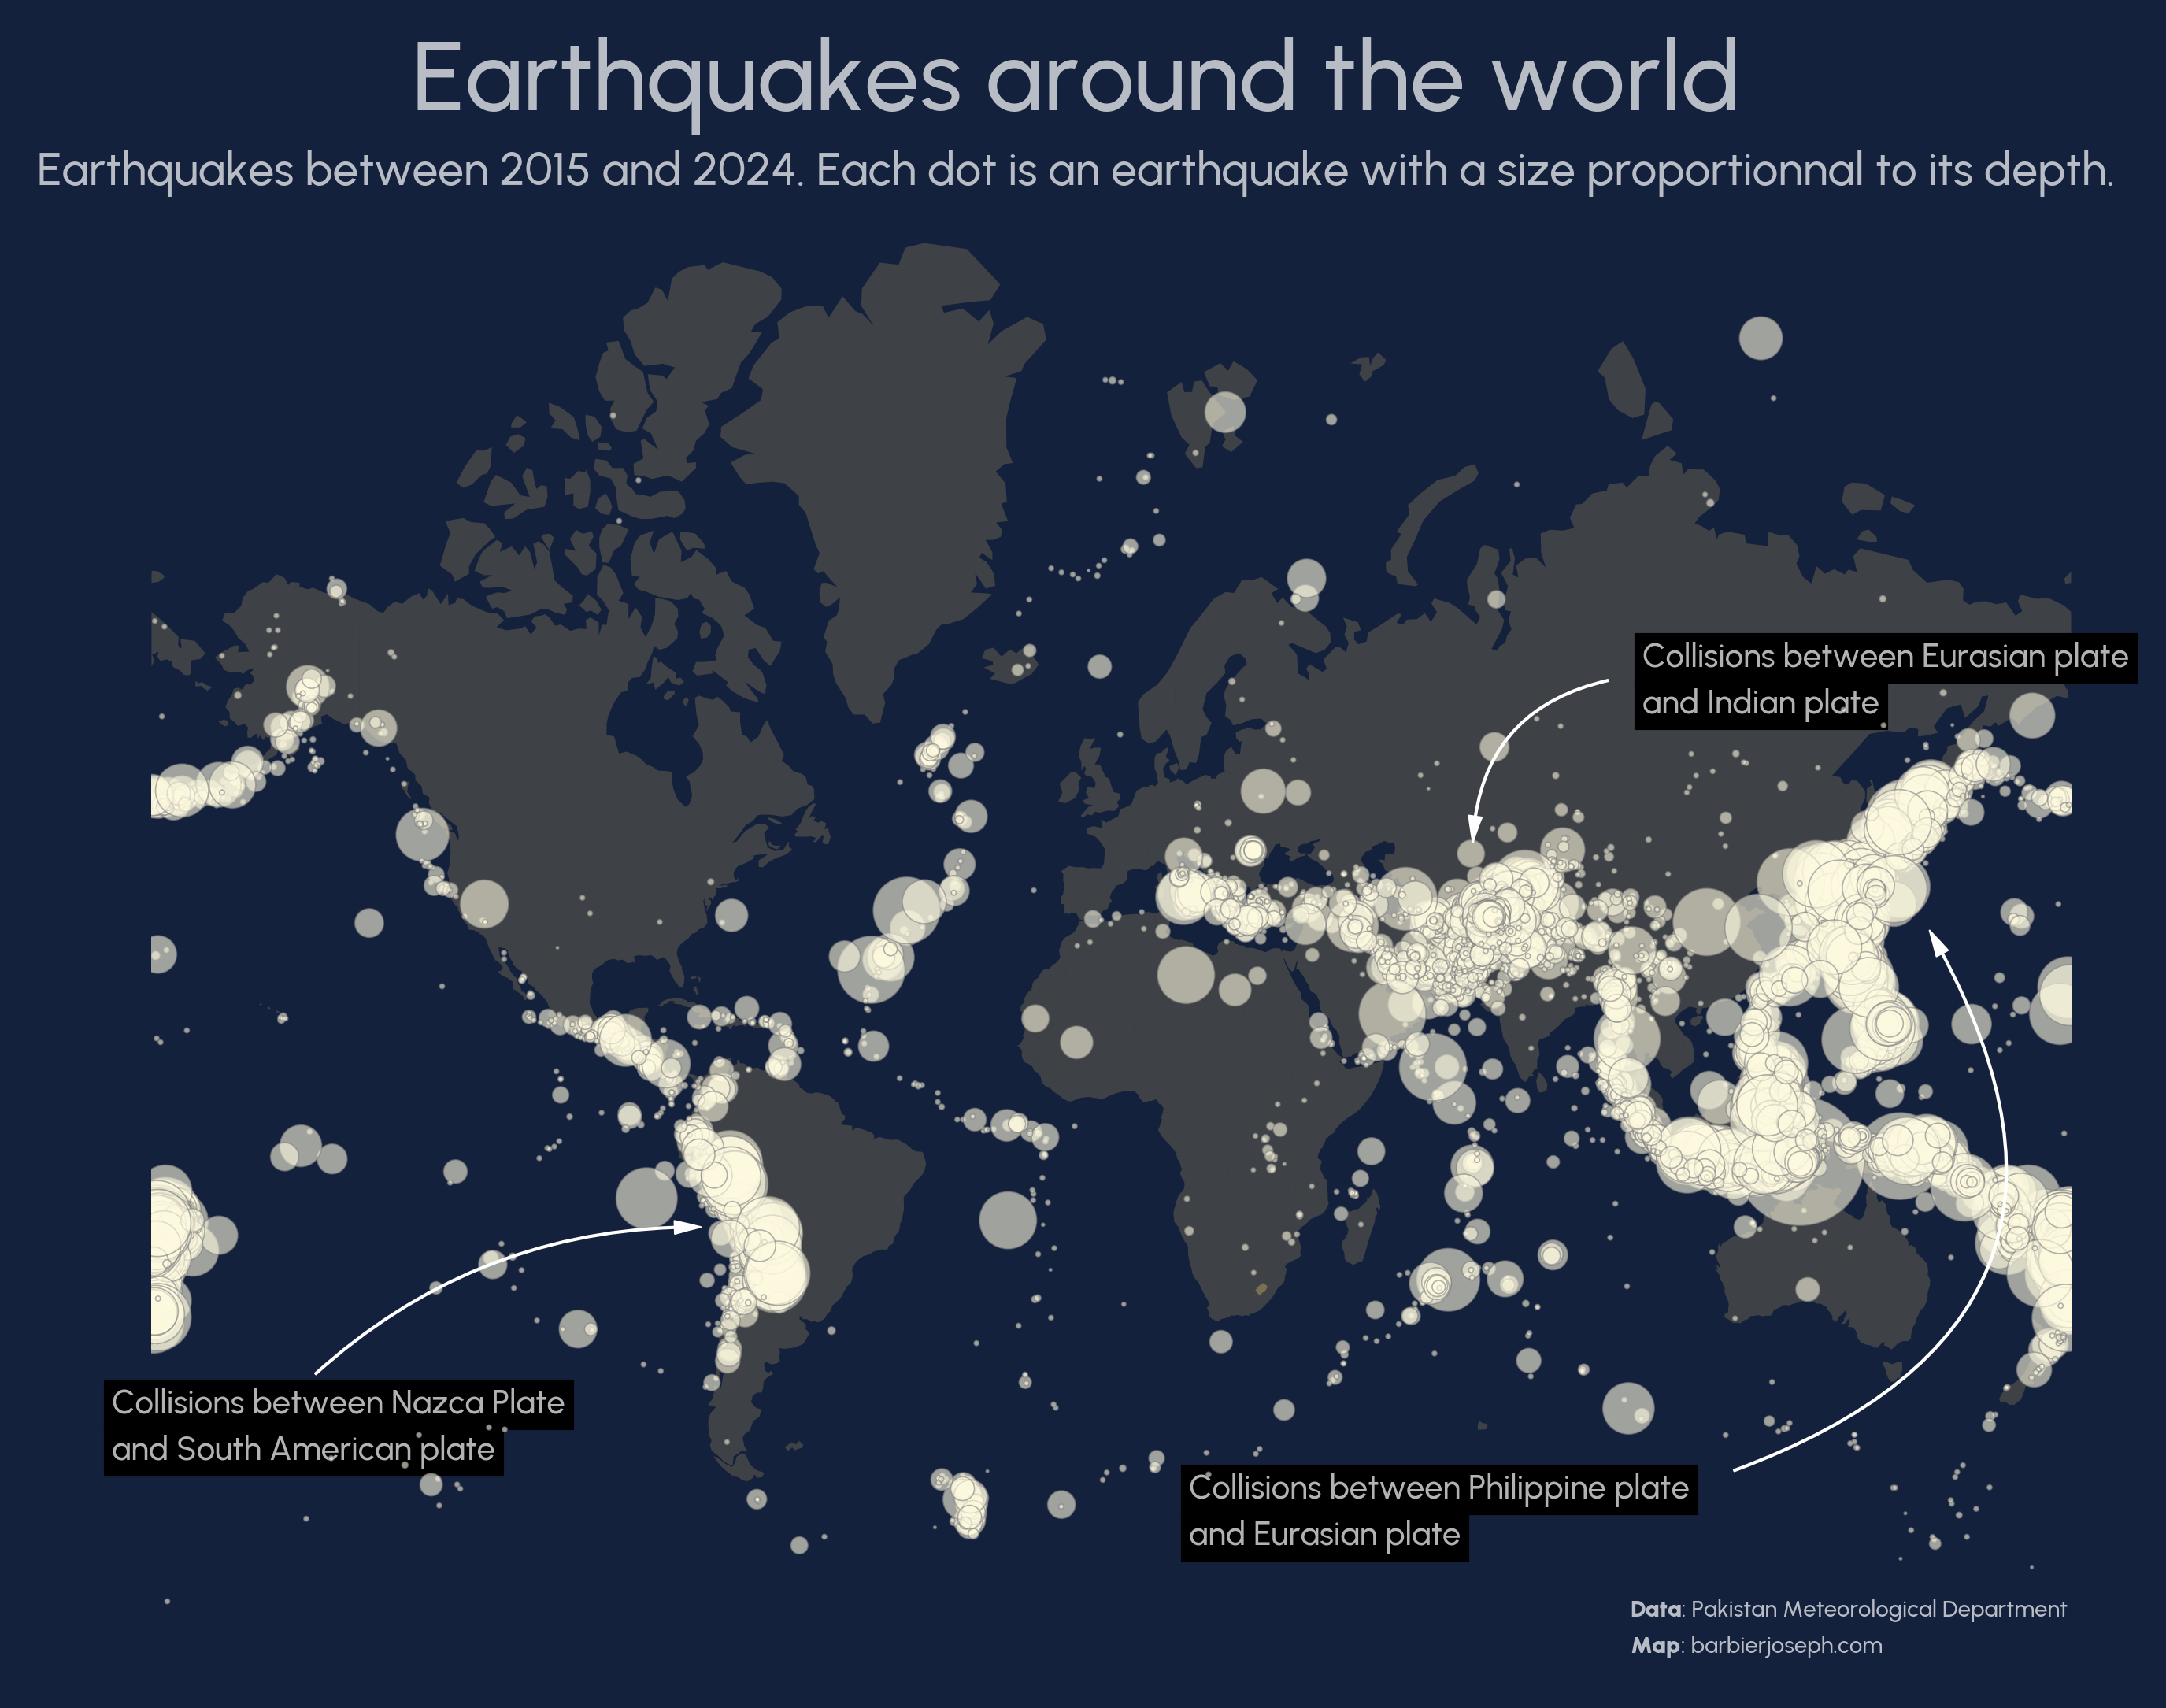

In [2]:
def draw_arrow(tail_position, head_position, invert=False, radius=0.5, color='black', fig=None):
   if fig is None:
      fig = plt.gcf()
   kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=color, lw=0.5)
   if invert:
      connectionstyle = f"arc3,rad=-{radius}"
   else:
      connectionstyle = f"arc3,rad={radius}"
   a = FancyArrowPatch(
      tail_position, head_position,
      connectionstyle=connectionstyle,
      transform=fig.transFigure,
      **kw
   )
   fig.patches.append(a)

# !!! change it to your path
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'Urbanist-Medium.ttf'
font = FontProperties(fname=font_path)
font_path = personal_path + 'Urbanist-Black.ttf'
bold_font = FontProperties(fname=font_path)

# colors
background_color = '#14213d'
map_color = (233/255, 196/255, 106/255, 0.2)
text_color = 'white'
bubble_color = '#fefae0'
alpha_text = 0.7

# initialize the figure
fig, ax = plt.subplots(figsize=(12, 8), dpi=300, subplot_kw={'projection': proj})
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_axis_off()

# background map
world.boundary.plot(ax=ax, linewidth=0, facecolor=map_color)

# transform the coordinates to the projection's CRS
pc = ccrs.PlateCarree()
new_coords = proj.transform_points(pc, df['Longitude'].values, df['Latitude'].values)

# bubble on top of the map
ax.scatter(
   new_coords[:, 0], new_coords[:, 1],
   s=df['Depth (km)'] * np.log(df['Depth (km)']) /10,
   color=bubble_color,
   linewidth=0.4,
   edgecolor='grey',
   alpha=0.6,
   zorder=10,
)

# title
fig_text(
   x=0.5, y=0.98, s='Earthquakes around the world',
   color=text_color, fontsize=30, ha='center', va='top', font=font,
   alpha=alpha_text
)

# subtitle
fig_text(
   x=0.5, y=0.92, s='Earthquakes between 2015 and 2024. Each dot is an earthquake with a size proportionnal to its depth.',
   color=text_color, fontsize=14, ha='center', va='top', font=font, alpha=alpha_text
)

# credit
text = """
<Data>: Pakistan Meteorological Department
<Map>: barbierjoseph.com
"""
fig_text(
   x=0.85, y=0.16, s=text, color=text_color, fontsize=7, ha='right', va='top',
   font=font, highlight_textprops=[{'font': bold_font}, {'font': bold_font}],
   alpha=alpha_text
)

# nazaca plate
highlight_textprops = [
   {"bbox": {"facecolor": "black", "pad": 2, "alpha": 1}, "alpha": alpha_text},
   {"bbox": {"facecolor": "black", "pad": 2, "alpha": 1}, "alpha": alpha_text}
]
draw_arrow((0.23, 0.27), (0.37, 0.35), fig=fig, color=text_color, invert=True, radius=0.2)
fig_text(x=0.16, y=0.265, s='<Collisions between Nazca Plate>\n<and South American plate>', fontsize=10, color=text_color, font=font, highlight_textprops=highlight_textprops, zorder=100)

# india plate
draw_arrow((0.69, 0.64), (0.64, 0.55), fig=fig, color=text_color, radius=0.4)
fig_text(x=0.7, y=0.66, s='<Collisions between Eurasian plate>\n<and Indian plate>', fontsize=10, color=text_color, font=font, highlight_textprops=highlight_textprops, zorder=100)

# philippine plate
draw_arrow((0.73, 0.22), (0.8, 0.51), fig=fig, color=text_color, radius=0.6)
fig_text(x=0.54, y=0.22, s='<Collisions between Philippine plate>\n<and Eurasian plate>', fontsize=10, color=text_color, font=font, highlight_textprops=highlight_textprops, zorder=100)

plt.savefig('map.png', dpi=300, bbox_inches="tight")
plt.show()